<a href="https://colab.research.google.com/github/Imjaeseokk/ajou-deep-learning-applications/blob/main/project/audio_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transformation of Audio Waveform

In [ ]:
!pip install librosa matplotlib soundfile

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/drive/MyDrive/Ajou_ISE/4학년_1학기/B113-1 딥러닝응용/팀프로젝트 1조/Queen-TheShowMustGoOn.mp3"
y, sr = librosa.load(file_path, sr=22050)

<ipython-input-3-aab8f11956f6>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


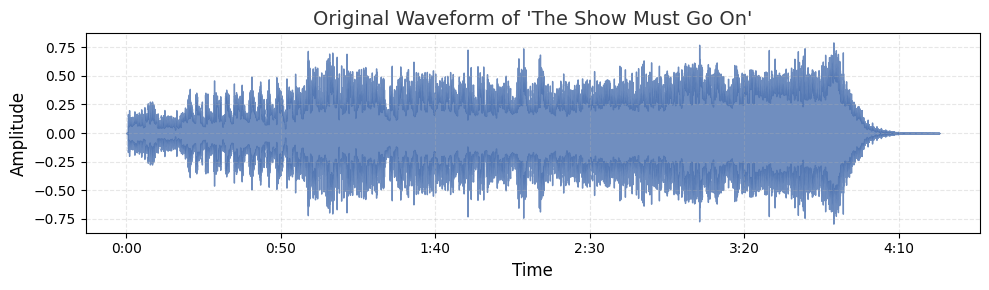

In [ ]:
# 2. 원본 Waveform 시각화 (컬러 스타일 개선)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr, color='#4c72b0', alpha=0.8)  # 세련된 블루 계열
plt.title("Original Waveform of 'The Show Must Go On'", fontsize=14, color='#333333')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 3. STFT → Spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

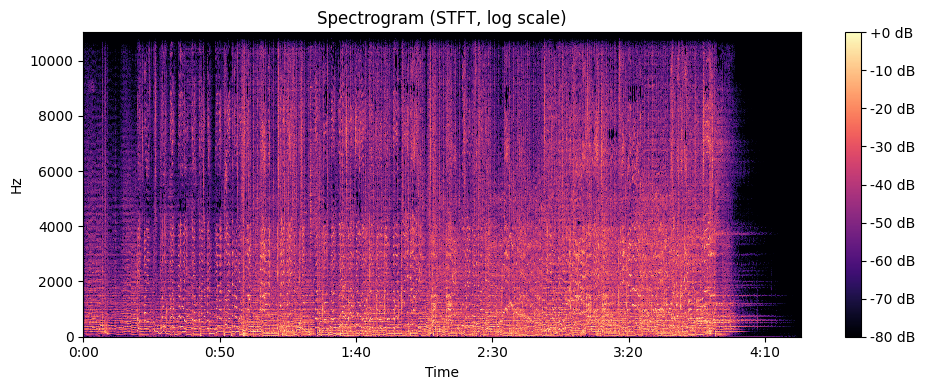

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectrogram (STFT, log scale)")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()


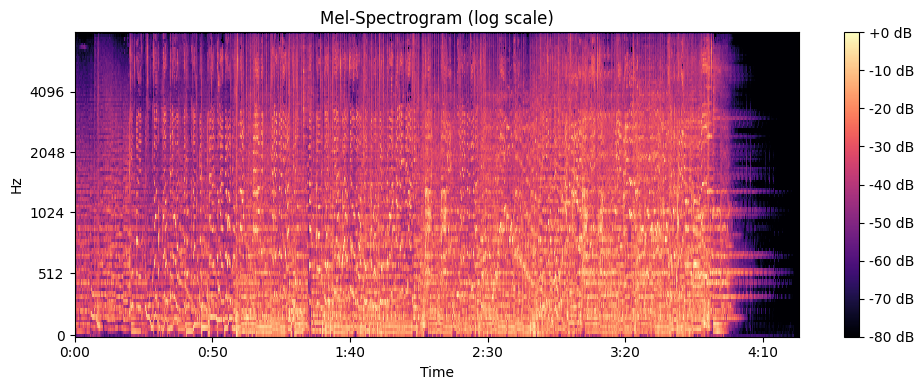

In [ ]:
# 4. Mel-spectrogram
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.title("Mel-Spectrogram (log scale)")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()